Draft for Overland Flow Module <br>
For this I am going off of CEE 586 notes <br>
The purpose is to teach about runoff (how it fits in the water balance) and give a working model of flow down a hillslope.

# Overview

This module simulates water flowing over a hillslope to explore one aspect within the *runoff* portion of the water balance, <br> $\Delta S = P-ET-R $ <br>
where $\Delta S$ is change in storage (like groundwater and lakes), $P$ is precipitation, $ET$ is evapotranspiration, and $R$ is runoff. <br>
It is important to remember that there are other dynamics like ponding, infiltration, and subsurface flow, but overland flow is one good piece in understanding runoff. Runoff is any non-ET flux of water out of the control volume, which could be overland flow, subsurface flow, and/or infiltration.

# Setting up the picture

Essentially describe Figure 1 from Henderson and Wooding, "Overland Flow and Groundwater Flow from a Steady 
Rainfall of Finite Duration"

# The Kinematic Wave Equation

derivatives... some derivation

# Numerical Methods

we can set up a grid with dx and dt

# Numerical KWE Solution

Going to write a function that we can call with different parameters for our solution to the hillslope

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
def run_num(L,s0,n,rd,rr,dt,dx): #run_num is short for runoff numerical solution
    #the inputs are hillsope length, slope, Manning's n, rain duration, rain rate, time step, and space step (distance between two simulated spots on the hill)
    
    st = 40*60 #simulation time of 40 minutes in units of seconds
    
    #make variables for the arrays in space and time
    time = 1+int(st/dt) #time length represented by j
    space = 1+int(L/dx) #space length represented by i
    t = [0] #start a time array at 0
    h = np.zeros([space,time]) #i,j. Array for heads along the hillslope in time
    runoff = np.zeros(time) #1-D array for runoff at the bottom of the hillslope (in length^2/time, missing the width of the stream)


    for j in range(0,(time-1)):
        t.append((j+1)*dt) #append the actual time in seconds
        for i in range(0,(space-1)):
            if j*dt > rd: #if it has stopped raining
                q = 0 #rain input is zero
            else: #if it has not stopped raining
                q = rr*dt #rain input is the rate times the timestep
            #calculate the adjacent head value in time and space
            h[i+1,j+1] = h[i+1,j] + q - ((dt*math.sqrt(s0))*(h[i+1,j]**(5/3) - h[i,j]**(5/3))/(dx*n))
        #calculate the runoff at the farthest head location
        runoff[j] = ((math.sqrt(s0)*(h[(space-1),j+1])**(5/3))/n)
        
    return runoff, h, t

# Plotting Runoff at the Bottom of the Hill

In [6]:
#get head distribution and runoff with these values
L = 100 #[m]
s0 = 0.01 #[-]
n = 0.0036 #[s/(m^(1/3))]
rd = 720 #[s]
rr = 0.0000027 #m/s
dt = 0.3 #s
dx = 10 #m

runoff_1, head_1, time = run_num(L,s0,n,rd,rr,dt,dx)

#what if the slope is steeper?
s0_2 = 0.05 #[-]

runoff_2, head_2, time = run_num(L,s0_2,n,rd,rr,dt,dx)

#what if the rain rate is more intense?
rr_3 = 0.0000035 #[m/s]

runoff_3, head_3, time = run_num(L,s0,n,rd,rr_3,dt,dx)

Text(0.5, 0, 'Time [$s$]')

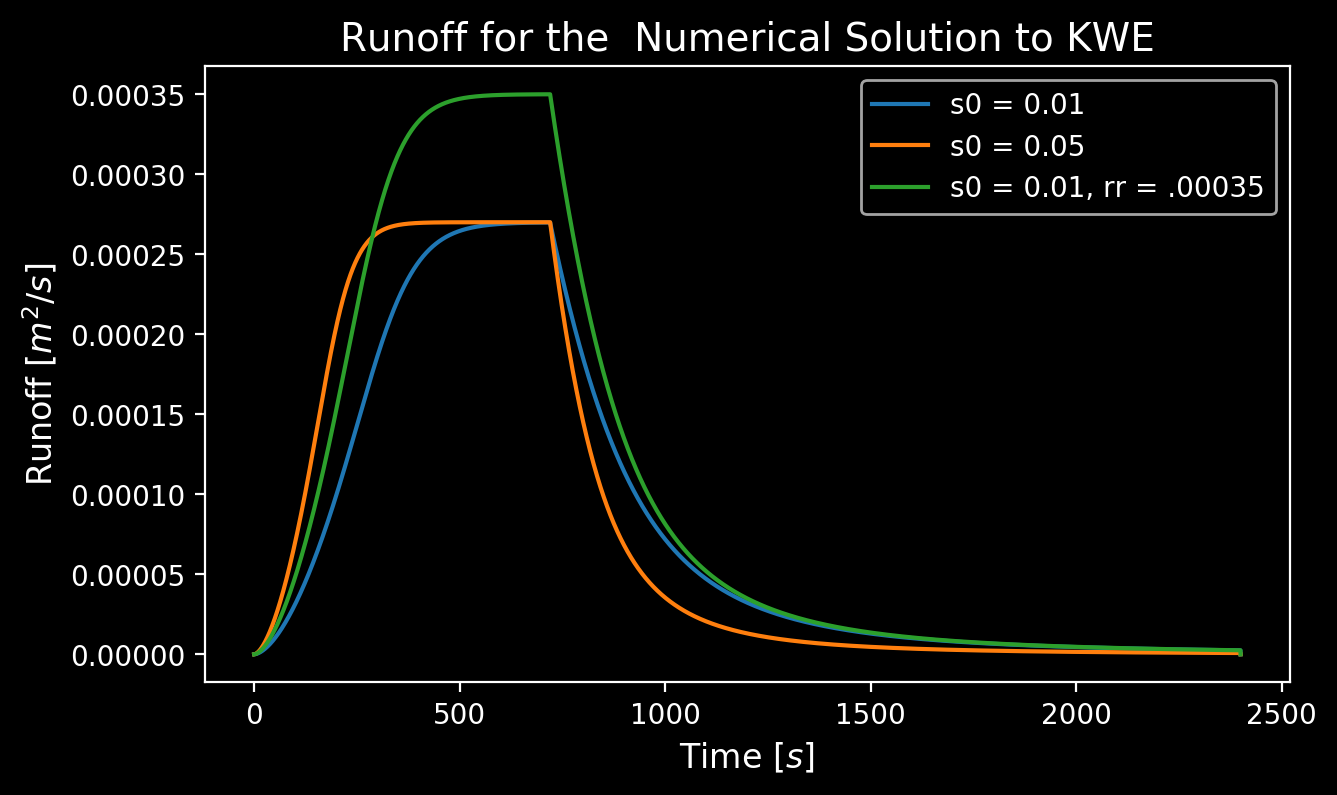

In [8]:
plt.figure(figsize=(7,4))
plt.plot(time,runoff_1,label= 's0 = 0.01')
plt.plot(time,runoff_2,label= 's0 = 0.05')
plt.plot(time,runoff_3,label= 's0 = 0.01, rr = .00035')
plt.legend()
plt.title('Runoff for the  Numerical Solution to KWE',fontsize=14)
plt.ylabel('Runoff [$m^2/s$]',fontsize=12)
plt.xlabel('Time [$s$]',fontsize=12)